In [0]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [0]:
Ground_Truth_BBOX=[1900,700,1800,1800]
Prediction_BBOX=[1800,800,1500,1500]

## 轉換成 [X0,Y0,X1,Y1]

In [0]:
Ground_Truth_BBOX_Transform=[Ground_Truth_BBOX[0],Ground_Truth_BBOX[1],Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform=[Prediction_BBOX[0],Prediction_BBOX[1],Prediction_BBOX[0]+Prediction_BBOX[2],Prediction_BBOX[1]+Prediction_BBOX[3]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The TextWith

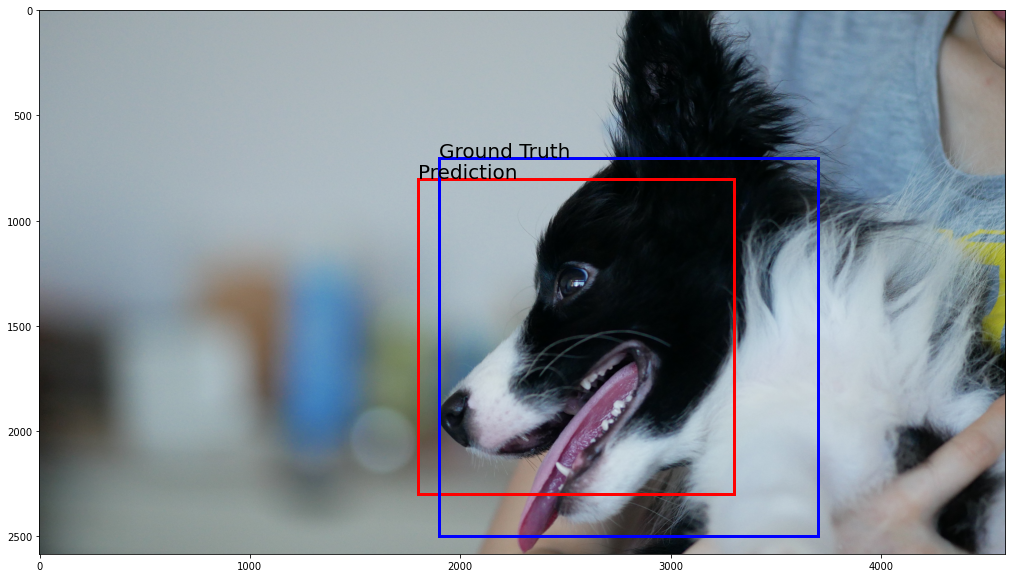

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)

fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Prediction',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)

plt.show()

## 定義IOU計算

In [0]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0]) #'''找出比較大的X0'''
    yA = max(boxA[1], boxB[1]) #'''找出比較大的y0'''
    xB = min(boxA[2], boxB[2]) #'''找出比較小的X1'''
    yB = min(boxA[3], boxB[3]) #'''找出比較小的y1'''

    ## 計算交集區域
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    ## 計算各自的BBOX大小
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    ## 計算IOU
    iou = interArea / float(boxAArea + boxBArea - interArea)  #'''交集/聯集'''

    # return the intersection over union value
    return iou

In [0]:
IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

In [17]:
print('IOU值：',IOU) 
'''應該要得到0.6196482836879266'''

IOU值： 0.6196482836879266


'應該要得到0.6196482836879266'